In [1]:
# dataset: graduation-rate-by-zone-school-type-school-stage-gender-nationality-group-ds

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_excel('graduation_rate.xlsx')
df.head()

,Year,Zone_EN,Coordinates,School_Type_EN,School_Stage_EN,Gender_EN,Unnamed: 6,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
0,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Female,NaN,Expat,8,243,251,0.968127
1,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Female,NaN,Local,20,353,373,0.946381
2,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Male,NaN,Expat,28,182,210,0.866667
3,2015,Ajman,"25.244000,55.266140",Public Schools,Cycle 3,Male,NaN,Local,23,262,285,0.919298
4,2015,Ajman,"25.244000,55.266140",Private Schools,Cycle 3,Female,NaN,Expat,11,424,435,0.974713


In [4]:
# Dropping "Coordinates" and "School_Stage_EN"
df = df.drop(["Coordinates" , "School_Stage_EN","Unnamed: 6" ], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       401 non-null    int64  
 1   Zone_EN                    401 non-null    object 
 2   School_Type_EN             401 non-null    object 
 3   Gender_EN                  401 non-null    object 
 4   LocalFlag_EN               401 non-null    object 
 5   Number of Failed students  401 non-null    int64  
 6   Number of Pass students    401 non-null    int64  
 7   Total Number of Students   401 non-null    int64  
 8   Graduation %               401 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 28.3+ KB


In [6]:
df.head()

,Year,Zone_EN,School_Type_EN,Gender_EN,LocalFlag_EN,Number of Failed students,Number of Pass students,Total Number of Students,Graduation %
0,2015,Ajman,Public Schools,Female,Expat,8,243,251,0.968127
1,2015,Ajman,Public Schools,Female,Local,20,353,373,0.946381
2,2015,Ajman,Public Schools,Male,Expat,28,182,210,0.866667
3,2015,Ajman,Public Schools,Male,Local,23,262,285,0.919298
4,2015,Ajman,Private Schools,Female,Expat,11,424,435,0.974713


# **Modeling - Target: Graduation %**

In [7]:
# Encoding catagorical columns to numerical:

df['Zone_EN'] = df['Zone_EN'].map({'Ajman': 0, 'Fujairah': 1, "DUBAI":2, "Ras AlKhaima":3, "Sharjah": 4, "Umm AlQuwain": 5,})
df['School_Type_EN'] = df['School_Type_EN'].map({'Public Schools': 0, 'Continuing Education Centers': 1, "Private Schools":2, "ACTVET":3})
df['Gender_EN'] = df['Gender_EN'].map({'Female': 0, 'Male': 1})
df['LocalFlag_EN'] = df['LocalFlag_EN'].map({'Local': 0, 'Expat': 1})


In [8]:
num_var = ['Number of Pass students',"Number of Failed students", "Total Number of Students"]
cat_var = ['Year','Zone_EN', "School_Type_EN", "Gender_EN", "LocalFlag_EN" , ]
y = df['Graduation %']
X = df[cat_var + num_var]
y = pd.DataFrame(y, columns=['Graduation %'])

In [9]:
#X

In [10]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [11]:
# Train-test split:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (320, 8)
X_test.shape: (81, 8)
y_train.shape: (320, 1)
y_test.shape: (81, 1)


In [12]:
#X_train

In [13]:
# Preprocessing with pipelines

from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 


pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])

pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])

pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, cat_var),
                                   ("numerical", pipeline_numerical, num_var),])

In [14]:
# Apply the pipeline

pipeline_full.fit(X_train)

X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

print(f"X_train_transformed.shape: {X_train_transformed.shape}")
print(f"X_test_transformed.shape: {X_test_transformed.shape}")
print()
print('X_train_transformed:', type(X_train_transformed))
print('X_test_transformed:', type(X_test_transformed))

X_train_transformed.shape: (320, 22)
X_test_transformed.shape: (81, 22)

X_train_transformed: <class 'numpy.ndarray'>
X_test_transformed: <class 'numpy.ndarray'>


**Linear Regression**

In [15]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [16]:
y_pred =lin_reg.predict(X_test_transformed)
#y_pred

In [17]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [[0.66699219]
 [0.89941406]
 [1.00878906]
 [0.96386719]
 [0.97949219]]
Actual 1-5:      Graduation %
373      0.788321
42       0.918089
107      0.974548
218      0.987500
369      1.000000


In [18]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error (RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))


Mean_Squared_Error(MSE):  0.005
Mean_Absolute_Error(MEA): 0.05
R2_Score: 0.767
RMSE: 0.072
Root_Mean_Squared_Log_Error(RMSLE): -2.624


In [19]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [20]:
Results_LinearReg = pd.DataFrame([['Linear_Reg', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_LinearReg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Linear_Reg,0.005,0.05,0.767,0.072,-2.624


In [21]:
# Cross-validation On Traing set:

scores = cross_val_score(lin_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.09983722 0.09350969 0.09634537 0.0825675  0.076621  ]
Mean: 0.08977615602280561
Standard deviation: 0.008756047836921596


In [22]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(lin_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')


Mean Accuracy:  70.398 % Variance:  0.395 %


* Mean Accuracy: 70.398%
The mean accuracy (R-squared) obtained from the cross-validation process. R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model fit.

* std: 0.395%
The variance of the R-squared scores obtained from cross-validation.

* R-squared: The R-squared value of approximately 70.398% indicates that the model explains about 70.398% of the variance in the target variable (Graduation %). This means the model has moderate predictive power, as it accounts for about 70.398% of the variability in the graduation percentages. However, there is still some unexplained variance.

In [23]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_LinearReg = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Linear_Reg"] * len(CV_LinearReg)  # Replace [1] with the desired values for the new column
CV_LinearReg = pd.concat([pd.Series(MODEL, name='Model'), CV_LinearReg], axis=1)

CV_LinearReg

,Model,Mean Accuracy,Std Accuracy
0,Linear_Reg,70.398,0.629


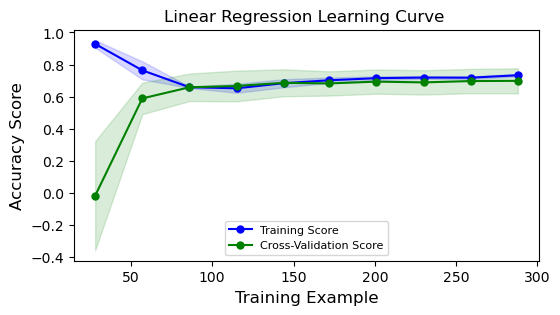

In [24]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lin_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Linear Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

1-Training Score: The blue line represents the accuracy score of the model on the training set as the training data size increases. It shows how well the model performs on the training data.

2-Cross-Validation Score: The green line represents the accuracy score of the model on the cross-validation (test) set as the training data size increases. It shows how well the model generalizes to unseen data.    

* If both lines converge to a high accuracy score as the training data size increases, it indicates that the model is performing well and generalizing effectively. This is typically the desired outcome.
* If there is a significant gap between the two lines, it suggests that the model is overfitting the training data (high training score but lower cross-validation score). In this case, you may need to consider techniques like regularization or feature selection to reduce overfitting.
* If both lines converge to a low accuracy score, it indicates that the model is underfitting the data, and you may need to explore more complex models or feature engineering to improve performance.
* From the learning curve, if both lines converge to a high accuracy score and show a small gap, it suggests that the model is performing well.

**Ridge Regression**

In [25]:
from sklearn.linear_model import Ridge

In [26]:
Ridge=Ridge(alpha=0.01)
Ridge.fit(X_train_transformed, y_train)

Ridge(alpha=0.01)

In [27]:
y_pred =Ridge.predict(X_test_transformed)
y_pred[0:5]

array([[0.66835688],
       [0.89927793],
       [1.00990535],
       [0.96193367],
       [0.97861925]])

In [28]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  0.005
Mean_Absolute_Error(MEA): 0.05
R2_Score: 0.766
RMSE: 0.073
Root_Mean_Squared_Log_Error(RMSLE): -2.624


In [29]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [30]:
Results_Ridge = pd.DataFrame([['Ridge', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_Ridge

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Ridge,0.005,0.05,0.766,0.073,-2.624


In [31]:
# Cross-validation On Traing set:

scores = cross_val_score(Ridge, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.09984088 0.09351286 0.09636045 0.08252473 0.07660813]
Mean: 0.08976941127137962
Standard deviation: 0.008770339611091884


In [32]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(lin_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  70.398 % Variance:  0.395 %


In [33]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Ridge = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Ridge"] * len(CV_Ridge)  # Replace [1] with the desired values for the new column
CV_Ridge = pd.concat([pd.Series(MODEL, name='Model'), CV_Ridge], axis=1)

CV_Ridge

,Model,Mean Accuracy,Std Accuracy
0,Ridge,70.398,0.629


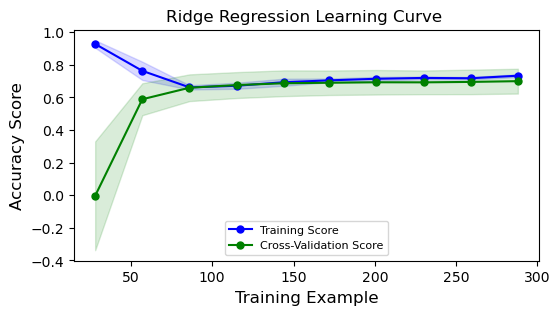

In [34]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=Ridge, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Ridge Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

**Lasso Regression**

In [35]:
from sklearn.linear_model import Lasso

In [36]:
Lasso=Lasso(alpha=0.01)
Lasso.fit(X_train_transformed, y_train)

Lasso(alpha=0.01)

In [37]:
y_pred =Lasso.predict(X_test_transformed)
#y_pred

In [38]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [0.71640521 0.96225246 0.96225246 0.96225246 0.96225246]
Actual 1-5:      Graduation %
373      0.788321
42       0.918089
107      0.974548
218      0.987500
369      1.000000


In [39]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))


Mean_Squared_Error(MSE):  0.007
Mean_Absolute_Error(MEA): 0.059
R2_Score: 0.693
RMSE: 0.083
Root_Mean_Squared_Log_Error(RMSLE): -2.488


In [40]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [41]:
Results_Lasso = pd.DataFrame([['Lasso', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_Lasso

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Lasso,0.007,0.059,0.693,0.083,-2.488


In [42]:
# Cross-validation On Traing set:

scores = cross_val_score(Lasso, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.10738422 0.09884343 0.11144707 0.09051044 0.091517  ]
Mean: 0.09994043112333979
Standard deviation: 0.008353383963766722


In [43]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(Lasso, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  63.609 % Variance:  0.317 %


In [44]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Lasso = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Lasso"] * len(CV_Lasso)  # Replace [1] with the desired values for the new column
CV_Lasso = pd.concat([pd.Series(MODEL, name='Model'), CV_Lasso], axis=1)

CV_Lasso

,Model,Mean Accuracy,Std Accuracy
0,Lasso,63.609,0.563


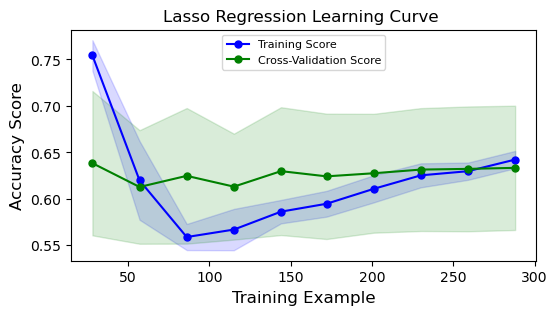

In [45]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=Lasso, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Lasso Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='upper center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

**Elastic Net Regression**

In [46]:
from sklearn.linear_model import ElasticNet

In [47]:
enr = ElasticNet(alpha=0.01)
enr.fit(X_train_transformed, y_train)

ElasticNet(alpha=0.01)

In [48]:
y_pred =enr.predict(X_test_transformed)
#y_pred

In [49]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [0.71483361 0.94115214 0.97221369 0.96751219 0.97734726]
Actual 1-5:      Graduation %
373      0.788321
42       0.918089
107      0.974548
218      0.987500
369      1.000000


In [50]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))


Mean_Squared_Error(MSE):  0.006
Mean_Absolute_Error(MEA): 0.053
R2_Score: 0.721
RMSE: 0.079
Root_Mean_Squared_Log_Error(RMSLE): -2.536


In [51]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [52]:
Results_ElasticNet = pd.DataFrame([['ElasticNet', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_ElasticNet

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,ElasticNet,0.006,0.053,0.721,0.079,-2.536


In [53]:
# Cross-validation On Traing set:

scores = cross_val_score(enr, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.10650778 0.09537716 0.1072618  0.08613102 0.08550678]
Mean: 0.09615690664317314
Standard deviation: 0.009434097604651956


In [54]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(enr, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  66.21 % Variance:  0.397 %


In [55]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_ElasticNet = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["ElasticNet"] * len(CV_ElasticNet)  
CV_ElasticNet = pd.concat([pd.Series(MODEL, name='Model'), CV_ElasticNet], axis=1)

CV_ElasticNet

,Model,Mean Accuracy,Std Accuracy
0,ElasticNet,66.21,0.63


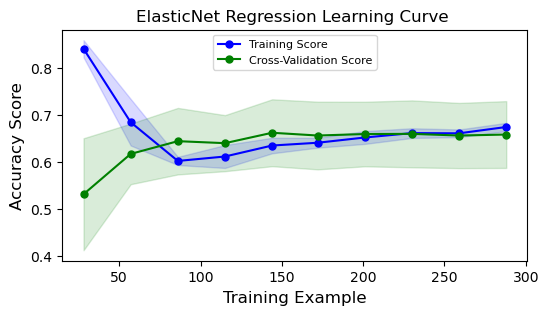

In [56]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=enr, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('ElasticNet Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='upper center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

**Bayesian Ridge regression**

In [57]:
from sklearn.linear_model import BayesianRidge

In [58]:
bayesian_reg = BayesianRidge()
bayesian_reg.fit(X_train_transformed, y_train)

BayesianRidge()

In [59]:
y_pred =bayesian_reg.predict(X_test_transformed)
#y_pred

In [60]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [0.67483468 0.90120246 1.00699141 0.9530823  0.97490487]
Actual 1-5:      Graduation %
373      0.788321
42       0.918089
107      0.974548
218      0.987500
369      1.000000


In [61]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))


Mean_Squared_Error(MSE):  0.005
Mean_Absolute_Error(MEA): 0.051
R2_Score: 0.766
RMSE: 0.073
Root_Mean_Squared_Log_Error(RMSLE): -2.624


In [62]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [63]:
Results_Bayesian_Reg = pd.DataFrame([['Bayesian_Reg', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_Bayesian_Reg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Bayesian_Reg,0.005,0.051,0.766,0.073,-2.624


In [64]:
# Cross-validation On Traing set:

scores = cross_val_score(bayesian_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.10042431 0.09383499 0.09767658 0.08127917 0.07663252]
Mean: 0.08996951387248833
Standard deviation: 0.009349236821904815


In [65]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(bayesian_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  70.243 % Variance:  0.433 %


In [66]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Bayesian_Reg = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Bayesian_Reg"] * len(CV_Bayesian_Reg) 
CV_Bayesian_Reg = pd.concat([pd.Series(MODEL, name='Model'), CV_Bayesian_Reg], axis=1)

CV_Bayesian_Reg

,Model,Mean Accuracy,Std Accuracy
0,Bayesian_Reg,70.243,0.658


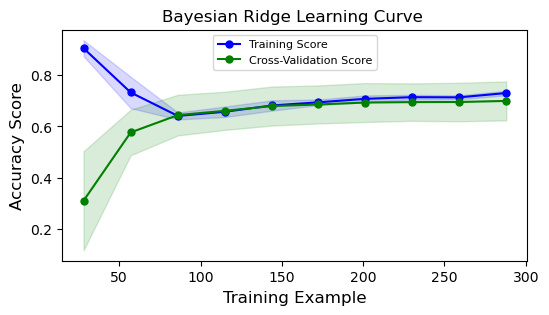

In [67]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=bayesian_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Bayesian Ridge Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='upper center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

**Decision Tree Regressor**

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train_transformed, y_train)

DecisionTreeRegressor(max_depth=5)

In [70]:
y_pred =tree_reg.predict(X_test_transformed)
#y_pred

In [71]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [0.71462509 0.94128122 0.97282718 0.99422455 1.        ]
Actual 1-5:      Graduation %
373      0.788321
42       0.918089
107      0.974548
218      0.987500
369      1.000000


In [72]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))


# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  0.004
Mean_Absolute_Error(MEA): 0.033
R2_Score: 0.829
RMSE: 0.062
Root_Mean_Squared_Log_Error(RMSLE): -2.779


In [73]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [74]:
Results_DecisionTree = pd.DataFrame([['Decision Tree', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_DecisionTree

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Decision Tree,0.004,0.033,0.829,0.062,-2.779


In [75]:
# Cross-validation On Traing set:

scores = cross_val_score(tree_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.05844466 0.04636708 0.05110245 0.05876433 0.10942072]
Mean: 0.06481984973966767
Standard deviation: 0.022782544038881598


In [76]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(tree_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  85.03 % Variance:  0.868 %


In [77]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_Desicion_Tree = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Decision Tree"] * len(CV_Desicion_Tree) 
CV_Desicion_Tree = pd.concat([pd.Series(MODEL, name='Model'), CV_Desicion_Tree], axis=1)

CV_Desicion_Tree

,Model,Mean Accuracy,Std Accuracy
0,Decision Tree,85.03,0.931


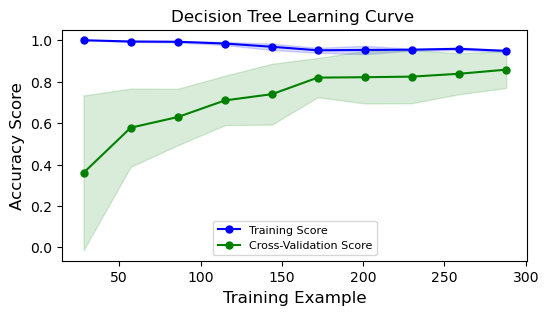

In [78]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=tree_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Decision Tree Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

**Linear SVM Regression**

In [79]:
from sklearn.svm import LinearSVR

In [80]:
svm_reg = LinearSVR(epsilon = 0.3)
svm_reg.fit(X_train_transformed, y_train)

LinearSVR(epsilon=0.3)

In [81]:
y_pred =svm_reg.predict(X_test_transformed)
#y_pred

In [82]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  0.053
Mean_Absolute_Error(MEA): 0.217
R2_Score: -1.356
RMSE: 0.23
Root_Mean_Squared_Log_Error(RMSLE): -1.469


In [83]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [84]:
Results_svm_reg = pd.DataFrame([['SVM', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_svm_reg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,SVM,0.053,0.217,-1.356,0.23,-1.469


In [85]:
# Cross-validation On Traing set:

scores = cross_val_score(svm_reg, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.23720735 0.24642974 0.2326357  0.23382758 0.22702589]
Mean: 0.23542525215667012
Standard deviation: 0.006405590223704403


In [86]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(svm_reg, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  -102.45 % Variance:  7.944 %


In [87]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_SVM_Reg  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["CV_SVM_Reg"] * len(CV_SVM_Reg ) 
CV_SVM_Reg  = pd.concat([pd.Series(MODEL, name='Model'), CV_SVM_Reg  ], axis=1)

CV_SVM_Reg 

,Model,Mean Accuracy,Std Accuracy
0,CV_SVM_Reg,-102.45,2.819


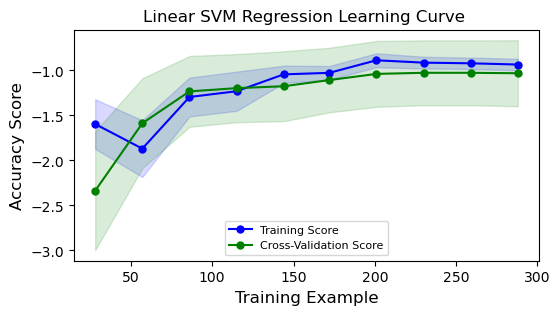

In [88]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=svm_reg, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Linear SVM Regression Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

**K-Nearest Neighbors**

In [89]:
from sklearn.neighbors import KNeighborsRegressor

In [90]:
knn = KNeighborsRegressor()
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [91]:
y_pred =knn.predict(X_test_transformed)
#y_pred

In [92]:
print("Predicted 1-5:", y_pred[0:5])
print("Actual 1-5:", y_test[0:5])

Predicted 1-5: [[0.73842211]
 [0.81502292]
 [0.97405265]
 [0.99431541]
 [0.98888889]]
Actual 1-5:      Graduation %
373      0.788321
42       0.918089
107      0.974548
218      0.987500
369      1.000000


In [93]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  0.003
Mean_Absolute_Error(MEA): 0.036
R2_Score: 0.854
RMSE: 0.057
Root_Mean_Squared_Log_Error(RMSLE): -2.86


In [94]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [95]:
Results_KNN = pd.DataFrame([['KNN', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_KNN

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,KNN,0.003,0.036,0.854,0.057,-2.86


In [96]:
# Cross-validation On Traing set:

scores = cross_val_score(knn, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.08405486 0.07458863 0.07192905 0.07495875 0.09173605]
Mean: 0.07945346972042025
Standard deviation: 0.007382690591110825


In [97]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(knn, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  76.82 % Variance:  0.229 %


In [98]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_KNN  = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["KNN"] * len(CV_KNN ) 
CV_KNN  = pd.concat([pd.Series(MODEL, name='Model'), CV_KNN  ], axis=1)

CV_KNN 

,Model,Mean Accuracy,Std Accuracy
0,KNN,76.82,0.478


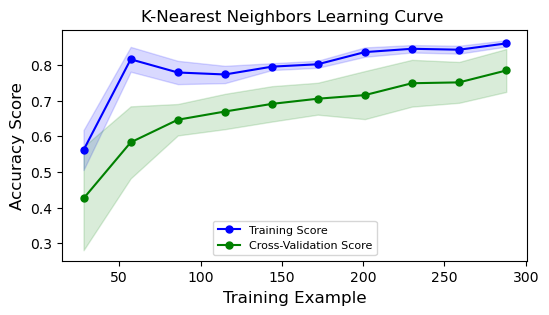

In [99]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=knn, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('K-Nearest Neighbors Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

**Random Forest Regressor**

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rnd=RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rnd.fit(X_train_transformed, y_train)

RandomForestRegressor(max_leaf_nodes=16, n_estimators=50, n_jobs=-1)

In [102]:
y_pred =rnd.predict(X_test_transformed)
#y_pred

In [103]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# MSE (Mean Squared Error):
print("Mean_Squared_Error(MSE): " , round(mean_squared_error(y_test, y_pred),3))

# Mean_Absolute_Error (MAE)
print('Mean_Absolute_Error(MEA):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

# R2_score 
print('R2_Score:', round(metrics.r2_score(y_test, y_pred),3))

# RMSE (Root Mean Squared Error):
RMSE = round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
print('RMSE:', RMSE)

# Root_ Mean_Squared_Log_Error(RMSLE)
print('Root_Mean_Squared_Log_Error(RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

Mean_Squared_Error(MSE):  0.002
Mean_Absolute_Error(MEA): 0.026
R2_Score: 0.913
RMSE: 0.044
Root_Mean_Squared_Log_Error(RMSLE): -3.115


In [104]:
MSE= round(mean_squared_error(y_test, y_pred),3)
MAE= round(metrics.mean_absolute_error(y_test, y_pred),3)
R2_Score= round(metrics.r2_score(y_test, y_pred),3)
RMSE= round(np.sqrt(mean_squared_error(y_test, y_pred)),3)
RMSLE= round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3)

In [105]:
Results_RandomForestReg = pd.DataFrame([['Random Forest', MSE , MAE, R2_Score , RMSE, RMSLE]],
               columns = ['Model', 'MSE', 'MAE', 'R2_Score' , 'RMSE', 'RMSLE'])
Results_RandomForestReg

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Random Forest,0.002,0.026,0.913,0.044,-3.115


In [106]:
# Cross-validation On Traing set:

scores = cross_val_score(rnd, X_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')

print("Scores:", np.sqrt(-scores))
print("Mean:", np.sqrt(-scores).mean())
print("Standard deviation:", np.sqrt(-scores).std())

Scores: [0.06026895 0.05141294 0.06551788 0.04073728 0.06934306]
Mean: 0.05745602016345217
Standard deviation: 0.01029799045787812


In [107]:
# Cross-validation On Traing set:

cv_scores = cross_val_score(rnd, X_train_transformed, y_train, cv=5)
print('Mean Accuracy: ', round(cv_scores.mean()*100, 3), '% Variance: ', round(cv_scores.var()*100, 3),'%')

Mean Accuracy:  88.413 % Variance:  0.121 %


In [108]:
# Calculate mean and variance of the cross-validation scores On Training set:
mean_accuracy = cv_scores.mean() * 100
var_accuracy = cv_scores.var() * 100

# Calculate standard deviation from variance
std_accuracy = np.sqrt(var_accuracy)

# Create a DataFrame to store the results
CV_RandomForest = pd.DataFrame({
    'Mean Accuracy': [round(mean_accuracy, 3)],
    'Std Accuracy': [round(std_accuracy, 3)]})

# Add a new column to the DataFrame
MODEL = ["Random Forest"] * len(CV_Lasso)  
CV_RandomForest = pd.concat([pd.Series(MODEL, name='Model'), CV_RandomForest], axis=1)

CV_RandomForest

,Model,Mean Accuracy,Std Accuracy
0,Random Forest,88.413,0.348


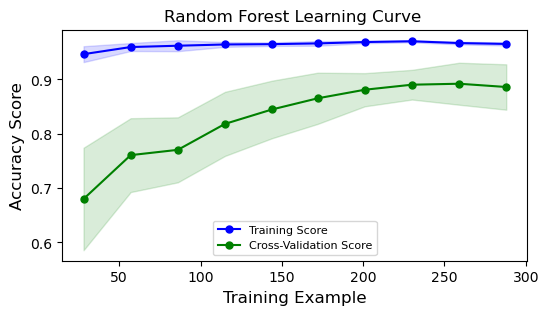

In [109]:
# Ploting the learning curve:

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=rnd, X=X_train_transformed, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

plt.figure(figsize=(6,3))
# Calculate training and test mean and std

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', marker='o', markersize=5, label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.title('Random Forest Learning Curve ')
plt.xlabel('Training Example', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

plt.legend(loc='lower center', fontsize=8)
#plt.savefig('graph.png')
plt.show()

# Quick Conclusion:

In [110]:
Result=pd.concat([Results_LinearReg, Results_Ridge, Results_Lasso, Results_ElasticNet, Results_Bayesian_Reg, Results_DecisionTree, Results_svm_reg, Results_KNN, Results_RandomForestReg])
Result.set_index('Model')
Result

,Model,MSE,MAE,R2_Score,RMSE,RMSLE
0,Linear_Reg,0.005,0.050,0.767,0.072,-2.624
0,Ridge,0.005,0.050,0.766,0.073,-2.624
0,Lasso,0.007,0.059,0.693,0.083,-2.488
0,ElasticNet,0.006,0.053,0.721,0.079,-2.536
0,Bayesian_Reg,0.005,0.051,0.766,0.073,-2.624
0,Decision Tree,0.004,0.033,0.829,0.062,-2.779
0,SVM,0.053,0.217,-1.356,0.230,-1.469
0,KNN,0.003,0.036,0.854,0.057,-2.860
0,Random Forest,0.002,0.026,0.913,0.044,-3.115


In summary, the **Random Forest Regression** model seems to perform the best based on the given metrics, as it has the lowest MSE, MAE, and RMSE, along with the highest R2 Score. 
The negative RMSLE values indicate that the model's predictions are relatively close to the actual values on a logarithmic scale.

In [111]:
# Result from Cross-validation on Training Set:

CV_Result=pd.concat([CV_LinearReg, CV_Ridge, CV_Lasso, CV_ElasticNet, CV_Bayesian_Reg, CV_Desicion_Tree,CV_SVM_Reg, CV_KNN, CV_RandomForest])
CV_Result.set_index('Model')
CV_Result

,Model,Mean Accuracy,Std Accuracy
0,Linear_Reg,70.398,0.629
0,Ridge,70.398,0.629
0,Lasso,63.609,0.563
0,ElasticNet,66.210,0.630
0,Bayesian_Reg,70.243,0.658
0,Decision Tree,85.030,0.931
0,CV_SVM_Reg,-102.450,2.819
0,KNN,76.820,0.478
0,Random Forest,88.413,0.348


In summary, the **Random Forest Regression** and **Decision Tree Regression** models seem to perform the best based on the mean accuracy from cross-validation. They have the highest mean accuracy and relatively low standard deviations, indicating consistent performance across folds. 

The negative mean accuracy for the Support Vector Machine (CV_SVM_Reg) indicates that the model's performance is poor.

[6.50841873e-03 1.71727524e-03 3.70578157e-03 5.74696684e-04
 4.43318851e-04 4.45869980e-01 5.14148651e-01 2.70318780e-02]


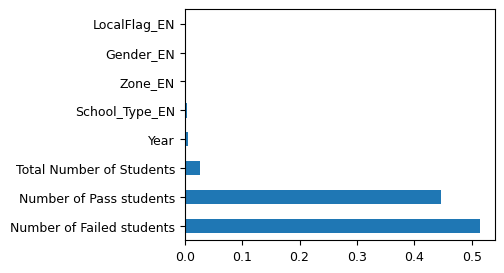

In [112]:
# Feature Importance Investigation

from sklearn.ensemble import RandomForestRegressor

rnd=RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
rnd.fit(X_train, y_train)

print(rnd.feature_importances_)

#plot graph of feature importances for better visualization

feat_importances = pd.Series(rnd.feature_importances_, index=X.columns )
feat_importances.nlargest(10).plot(kind='barh', figsize=(4,3), fontsize=9)
plt.show()

Text(0.5, 0, 'Relative Importance')

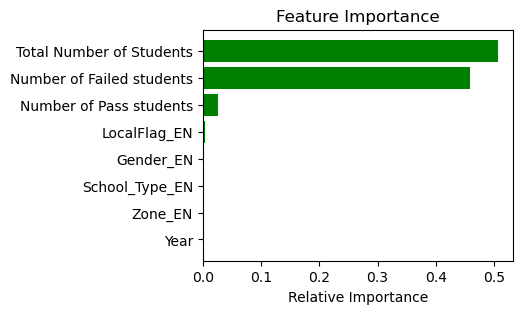

In [113]:
#Forward stepwise selection of the feature importance

stepwise_model = RandomForestRegressor(n_estimators=50, max_leaf_nodes=16, n_jobs=-1)
stepwise_model.fit(X_train, y_train )

fig, ax = plt.subplots(figsize=(4, 3))
importances = stepwise_model.feature_importances_
indices = np.argsort(importances)
feature_names = cat_var + num_var
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in range(len(indices))])
#plt.axvline(x=0.05,label='relative importance = 0.05')
plt.xlabel('Relative Importance')
